## Heart Disease Project

### Problem definition.

* Building a machine learning model to predict heart disease status of patients given their clinical and medical records.

### Data Sources

The original data source was from cleaveland database machine learning repository https://archive.ics.uci.edu/ml/datasets/Heart+Disease
    
There is also an available version of it on kaggle. https://www.kaggle.com/ronitf/heart-disease-uci

## Data Features

The following are data dictionaires of attributes in the dataset

1. age : age in years

2. sex : This represent's the gender of the patient's (1 = male; 0 = female)

3. cp  : chest pain type
  * -- Value 0: typical angina
  * -- Value 1: atypical angina
  *  -- Value 2: non-anginal pain
  *  -- Value 3: asymptomatic
   
4. trestbps : resting blood pressure (in mm Hg on admission to the hospital)

5. chol : serum cholestoral in mg/dl

6. fbs  : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

7. restecg:  resting electrocardiographic results

8. thalach: maximum heart rate achieved

9. exang : exercise induced angina (1 = yes; 0 = no)

10. oldpeak : ST depression induced by exercise relative to rest

11. slope: the slope of the peak exercise ST segment

12. ca: number of major vessels (0-3) colored by flourosopy

13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

14. num: diagnosis of heart disease (angiographic disease status)
       -- Value 0: < 50% diameter narrowing
       -- Value 1: > 50% diameter narrowing
       (in any major vessel: attributes 59 through 68 are vessels)

In [93]:
#Importing Data analysis and visualisation Tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly 

%matplotlib inline
plt.style.use('seaborn-whitegrid')

# Importing Machine learning models from scikit-learn.
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Importing various evaluation matrix.
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

In [94]:
heart_disease = pd.read_csv('./RL_dataset/heart-disease-new.csv')
heart_disease.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [95]:
heart_disease.tail(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [96]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


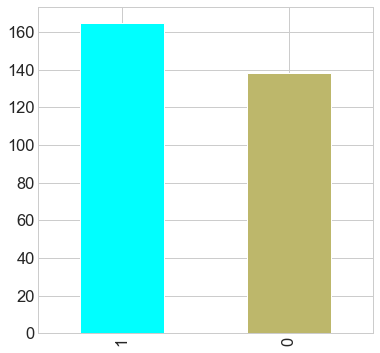

In [97]:
heart_disease['target'].value_counts().plot.bar(figsize =(6, 6), color = ['aqua', 'darkkhaki']);

* 1 = Heart Disease
* 0 = NO heart Disease

## Frequency of Heart Disease According to sex

In [98]:
pd.crosstab(heart_disease['target'], heart_disease['sex'])

sex,0,1
target,,
0,24,114
1,72,93


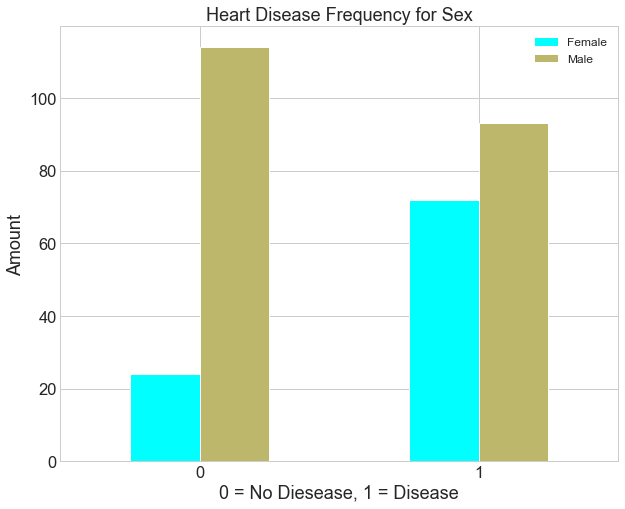

In [99]:
pd.crosstab(heart_disease['target'], heart_disease['sex']).plot(kind = 'bar', 
                                                                figsize =(10, 8), 
                                                                color = ['aqua', 'darkkhaki'])


plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Diesease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"], fontsize = 12);
plt.xticks(rotation=0);
plt.rc('axes', labelsize= 15);
plt.rc('figure', titlesize= 15);

## Finding  the relationship between age and heart disease

In [100]:
under_60_years = heart_disease[heart_disease['age'] <= 60]
over_60_years = heart_disease[heart_disease['age'] >= 60]

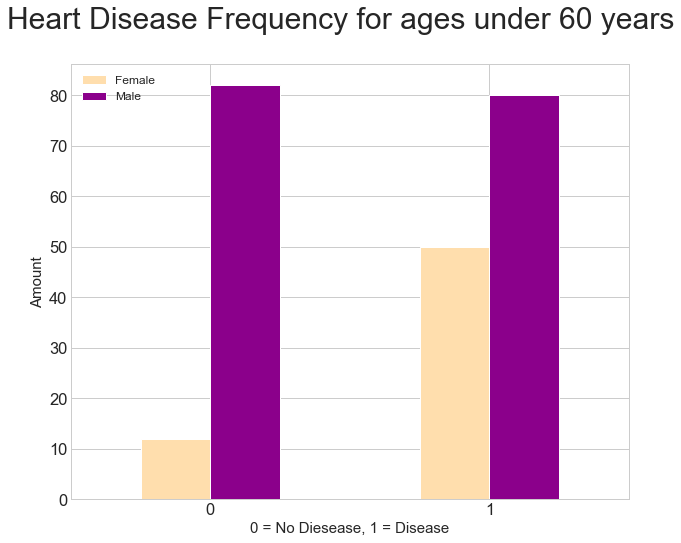

In [101]:
pd.crosstab(under_60_years['target'], heart_disease['sex']).plot(kind = 'bar', 
                                                                figsize =(10, 8), 
                                                                color = ['navajowhite', 'darkmagenta'])


plt.suptitle('Heart Disease Frequency for ages under 60 years', fontsize=30)
plt.xlabel("0 = No Diesease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"], fontsize = 12);
plt.xticks(rotation=0);
plt.rc('axes', labelsize= 15);
plt.rc('figure', titlesize= 15);

Findings according to the data
* There is a 80% of female under 60 years being positive to heart Disease compared to the 19% of being negative.
* There is 49% of Male under 60 years being positive to heart Disease compared to 51% of being negative.
* in general the total count of male suffering from the heart disease is more than of females but on average females are more likely to suffer a heart disease.

In [102]:
under_60_years['sex'].value_counts()

1    162
0     62
Name: sex, dtype: int64

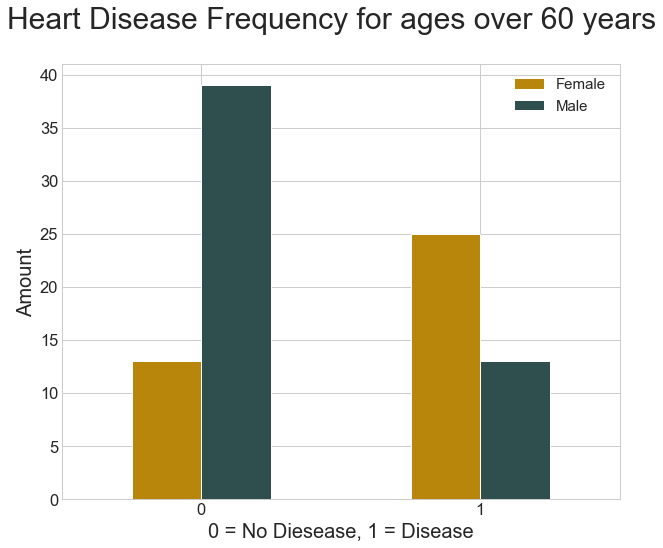

In [103]:
pd.crosstab(over_60_years['target'], heart_disease['sex']).plot(kind = 'bar', 
                                                                figsize =(10, 8), 
                                                                color = ['darkgoldenrod', 'darkslategray'])


plt.xlabel("0 = No Diesease, 1 = Disease", fontsize = 20)
plt.ylabel("Amount", fontsize = 20);
plt.legend(["Female", "Male"], fontsize = 15);
plt.xticks(rotation=0);
plt.rc('axes', labelsize= 15);
plt.suptitle('Heart Disease Frequency for ages over 60 years', fontsize=30);

Findings according to data
* Females over the ages of 60 years are more likely to suffer a heart disease.
* There is a 65% chance of females over 60 years to test positive to heart disease while compared to 34% to being negative to heart disease.

* There is 25% chance of Male over 60 years to test positive to heart disease while compared to 75% to being negative to heart disease.
* The total count males having a heart condition still outnumbers the female count but on average the females are more likely to test positive to a heart condition

External source: https://www.health.harvard.edu/heart-health/the-heart-attack-gender-gap#:~:text=On%20average%2C%20a%20first%20heart,women%20as%20well%20as%20men.

## Finding the relationship between Age and maximum heart achieved

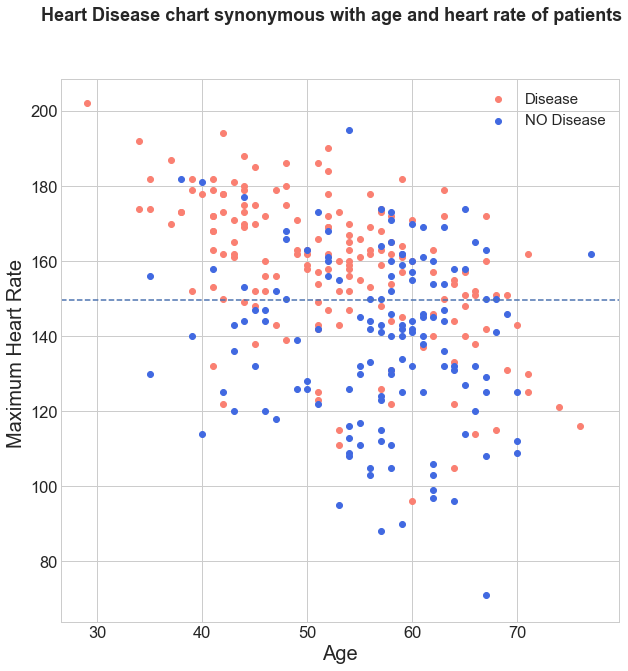

In [104]:
plt.figure(figsize = (10, 10))
plt.scatter(heart_disease.age[heart_disease['target']==1],
           heart_disease.thalach[heart_disease['target']== 1],
            c = 'salmon');

plt.scatter(heart_disease.age[heart_disease['target']==0],
           heart_disease.thalach[heart_disease['target']==0],
            c = 'royalblue');

plt.xlabel("Age", fontsize = 20)
plt.ylabel("Maximum Heart Rate ", fontsize = 20);
plt.legend(["Disease", "NO Disease"], fontsize = 15);
plt.rc('axes', labelsize= 15);
plt.suptitle('Heart Disease chart synonymous with age and heart rate of patients', fontsize=18, fontweight = 'bold');

plt.axhline(y=heart_disease['thalach'].mean(), ls = '--');

#### Finding the distribution the patient ages

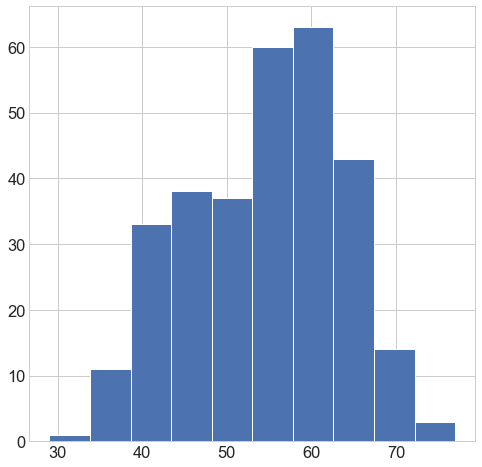

In [105]:
heart_disease['age'].hist(figsize = (8, 8));

### Finding relationship between chest pain type and heart disease.

cp : chest pain type

* -- Value 0: typical angina
* -- Value 1: atypical angina
* -- Value 2: non-anginal pain
* -- Value 3: asymptomatic

In [106]:
pd.crosstab(heart_disease['cp'], heart_disease['target'])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


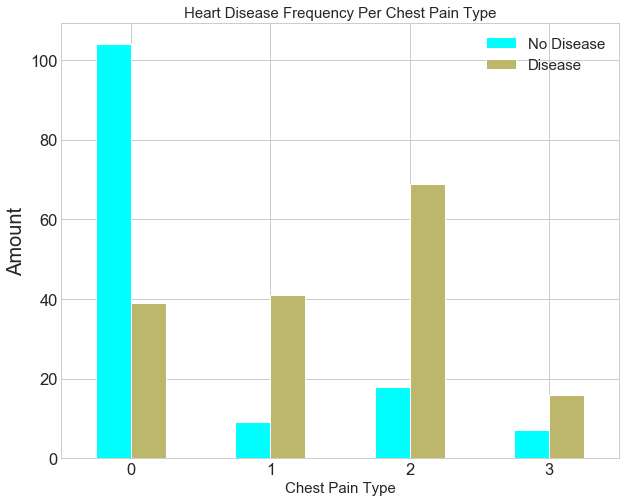

In [107]:
pd.crosstab(heart_disease['cp'], heart_disease['target']).plot(kind = 'bar',
                                                               figsize = (10, 8),
                                                               color = ['aqua', 'darkkhaki']);

plt.title("Heart Disease Frequency Per Chest Pain Type", fontsize = 15)
plt.xlabel("Chest Pain Type", fontsize = 15)
plt.ylabel("Amount", fontsize= 20)
plt.legend(["No Disease", "Disease"], fontsize = 15)
plt.xticks(rotation=0);

Findings

* Non-anginal pain has the highest causes of heart disease in patients.
* Non- anginal/Non-cardiac chest pain is often described as feeling like angina, the chest pain caused by heart disease. The patient feels a pressure or squeezing pain behind the breast bone. Some people also report the pain spreads to the neck, left arm, or back. The pain can last for a few minutes or for hours

### Modelling the data set

In [108]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [109]:
x = heart_disease.drop(['target'], axis = 1)
y = heart_disease['target']

In [110]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [111]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

#### Splitting the data into training and test data for machine learning

In [112]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

In [113]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
88,54,0,2,110,214,0,1,158,0,1.6,1,0,2
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
241,59,0,0,174,249,0,1,143,1,0.0,1,0,2
49,53,0,0,138,234,0,0,160,0,0.0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,46,1,1,101,197,1,1,156,0,0.0,2,0,3
72,29,1,1,130,204,0,0,202,0,0.0,2,0,2
268,54,1,0,122,286,0,0,116,1,3.2,1,2,2
107,45,0,0,138,236,0,0,152,1,0.2,1,0,2


## The following machine learning models would be used for evaluating the dataset

* KNeighbor Classifier
* RandomForest Classifier
* kNeighborClassifier
* Linear SVC

In [114]:

# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNeighbor": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier(),
           "Support vector Classifier (SVC)" : SVC()}

# Create a function to fit and score models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(28)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(x_train, y_train)
        # Evaluate the model andppend its score to model_scores
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [115]:
evaluate_model = fit_and_score(models = models,
                              x_train = x_train,
                              x_test = x_test,
                              y_train = y_train,
                              y_test = y_test)

evaluate_model

C:\Users\Blessed Yahaya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Blessed Yahaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Blessed Yahaya\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


{'Logistic Regression': 0.8360655737704918,
 'KNeighbor': 0.6721311475409836,
 'Random Forest': 0.8688524590163934,
 'Support vector Classifier (SVC)': 0.47540983606557374}

## Visual comparism of machine learning model

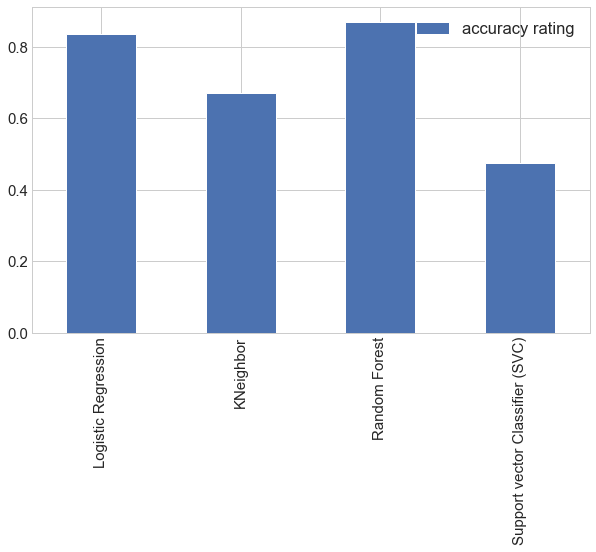

In [116]:
visual_compare = pd.DataFrame(evaluate_model, index=['accuracy rating'])
visual_compare.T.plot.bar(figsize = (10, 6), fontsize = 15);

## Findings
* Logistic regression performed  best in analysing and finding patterns within our heart disease dataset.

## Tuning Hyperparameters of machine learning model to optimize result

* KNeighbor Classifier

In [117]:
train_scores = []
test_scores = []

#creating a random seed to produce constant result.
np.random.seed(23)

#creating different values for neighbors
neigh_range = range(1, 30)

#assigning Kneighbours to an instance
neigh = KNeighborsClassifier()

#looping through neighbours
for i in neigh_range:
    neigh.set_params(n_neighbors = i)
    
    #fitting the algorithm
    neigh.fit(x_train, y_train)
    
     # Update the training scores list
    train_scores.append(neigh.score(x_train, y_train))
    
    # Update the test scores list
    test_scores.append(neigh.score(x_test, y_test))
    
    

In [118]:
train_scores

[1.0,
 0.8057851239669421,
 0.7933884297520661,
 0.768595041322314,
 0.7644628099173554,
 0.731404958677686,
 0.743801652892562,
 0.71900826446281,
 0.7231404958677686,
 0.7107438016528925,
 0.7148760330578512,
 0.7107438016528925,
 0.6735537190082644,
 0.6776859504132231,
 0.6694214876033058,
 0.6776859504132231,
 0.6528925619834711,
 0.6818181818181818,
 0.6694214876033058,
 0.6900826446280992,
 0.6900826446280992,
 0.6818181818181818,
 0.6942148760330579,
 0.6859504132231405,
 0.6859504132231405,
 0.6942148760330579,
 0.6652892561983471,
 0.6859504132231405,
 0.6652892561983471]

In [119]:
test_scores

[0.6065573770491803,
 0.5901639344262295,
 0.6229508196721312,
 0.7213114754098361,
 0.6721311475409836,
 0.639344262295082,
 0.7049180327868853,
 0.6885245901639344,
 0.7049180327868853,
 0.7213114754098361,
 0.7540983606557377,
 0.7377049180327869,
 0.7049180327868853,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7540983606557377,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7049180327868853,
 0.7377049180327869,
 0.7049180327868853,
 0.7049180327868853,
 0.6721311475409836]

## Creating Visualisation for model scores

Maximum KNN score on the test data: 75.41%


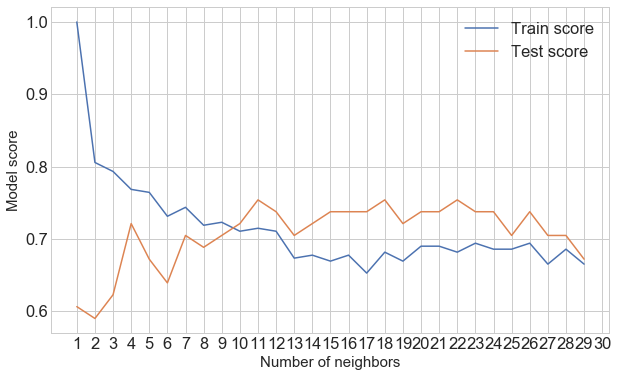

In [120]:
plt.figure(figsize = (10, 6))
plt.plot(neigh_range, train_scores, label="Train score")
plt.plot(neigh_range, test_scores, label="Test score")
plt.xlabel("Number of neighbors")
plt.xticks(np.arange(1, 31, 1))
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

## Tuning Hyper Parameters For  SVC Using Grid search CV

In [121]:
# Creating a list of hyperparameters to tuned.
new_c = [0.1, 1, 10, 100, 1000]
new_gamma = [00.1, 0.1, 1, 10, 100,1000]

# instantiating the hyperparameter list to a dictionary.
paramsgrid = {'C': new_c, 'gamma':new_gamma}


#Instantiate machine learning algorithm
svc = SVC()

#Instantiate GridsearchCV function.
grid_search = GridSearchCV(svc, paramsgrid, verbose= True, cv=5)

#fitting Feature matrix into tuned machine learning model
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.2s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [0.1, 0.1, 1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=True)

In [122]:
grid_search.best_params_

{'C': 0.1, 'gamma': 0.1}

In [123]:
grid_search.score(x_test, y_test)

0.47540983606557374

## Hyperparameter tuning for RandomForest and LogisticRegression.

In [124]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [125]:

# Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished
C:\Users\Blessed Yahaya\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='warn', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='warn', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='warn', n_iter=20, n_jobs=None,
                   param_distributi...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [126]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [127]:
rs_log_reg.score(x_test, y_test)

0.8688524590163934

In [128]:
# Setup random seed
np.random.seed(35)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   40.8s finished
C:\Users\Blessed Yahaya\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [129]:
rs_rf.best_params_

{'n_estimators': 410,
 'min_samples_split': 14,
 'min_samples_leaf': 19,
 'max_depth': 10}

In [130]:
rs_rf.score(x_test, y_test)

0.8524590163934426

In [131]:
evaluate_model

{'Logistic Regression': 0.8360655737704918,
 'KNeighbor': 0.6721311475409836,
 'Random Forest': 0.8688524590163934,
 'Support vector Classifier (SVC)': 0.47540983606557374}

## Hyperparameter tuning with GridSearchCv with randomForest

In [132]:

# Different hyperparameters for our RandomForest model
rf_gs_grid = {"n_estimators": np.arange(10, 20, 5),
           "max_depth": [None, 3],
           "min_samples_split": np.arange(2, 10, 2),
           "min_samples_leaf": np.arange(1, 10, 2)}

# Setup grid hyperparameter search for LogisticRegression
gs_rf_reg = GridSearchCV(RandomForestClassifier(),
                          param_grid=rf_gs_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_rf_reg.fit(x_train, y_train);

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    6.5s finished
C:\Users\Blessed Yahaya\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [133]:
gs_rf_reg.best_params_

{'max_depth': 3,
 'min_samples_leaf': 5,
 'min_samples_split': 6,
 'n_estimators': 10}

In [134]:
gs_rf_reg.score(x_test, y_test)

0.8360655737704918

After Tuning the hyper parameters on our model, Our RandomForestClassifier the model got an increased accuracy score of 0.75
up from 0.72 accuracy score

## Evaluting our Tuned RandomForest classifier with other measurement metric's

* ROC curve
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

In [135]:
# making prediction on our feature matrice
y_preds = gs_rf_reg.predict(x_test)

In [136]:
# plotting roc and auc curves
print(confusion_matrix(y_test, y_preds))

[[28  4]
 [ 6 23]]


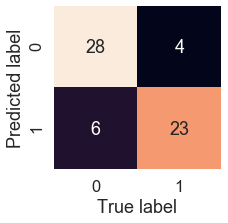

In [137]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(y_test, y_preds)

In [138]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85        32
           1       0.85      0.79      0.82        29

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61

